<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Ejercicio de clasificación con redes neuronales profundas (DNN)

Ejemplo de clasificación utilizando redes neuronales para la clasificación de imagenes<br>

v1.1

In [1]:
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import keras
from keras.models import Sequential
#from keras.utils import to_categorical  
from keras.utils.np_utils import to_categorical # Si esto no funciona, probar con el import anterior

# Recolectar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline1.png" width="1000" align="middle">

In [2]:
from keras.datasets import fashion_mnist

# Leer el dataset de mnist
(data_X_train, data_y_train), (data_X_test, data_y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


### `Fashion MNIST dataset`:
El dataset **`Fashion MNIST`** contiene 70.000 imagenes de categorías de ropa (remeras, zapatillas, pantalones). Cada imagen es de 28x28 píxeles en escala de grises (1 canal o 1 nivel de profundidad). Es uno de los dataset más utilizados para poner a prueba algoritmos de clasificación de imagenes.<br> [Dataset source](https://keras.io/api/datasets/fashion_mnist/)
- La entrada (X) es una variable imagen de 28x28
- La salida (y) es el la posible categoría de ropa que pertenece la imagen:

    - 0 -> T-shirt/top (remera de manga corta)
    - 1	-> Trouser (pantalón)
    - 2	-> Pullover (pulover)
    - 3	-> Dress (vestido)
    - 4	-> Coat (saco)
    - 5	-> Sandal (sandalia)
    - 6	-> Shirt (remera de manga larga)
    - 7	-> Sneaker (zapatilla)
    - 8	-> Bag (bolso)
    - 9	-> Ankle boot (bota)


In [3]:
category_list = ["remera_corta", "pantalon", "pulover", "vestido", "saco", "sandal",
                 "remera_larga", "zapatilla", "bolso", "bota"]

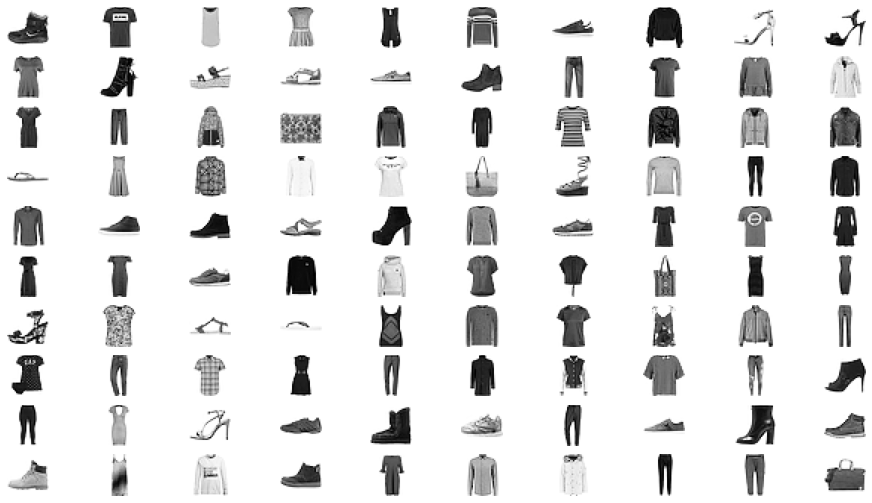

In [4]:
# Visualizar las 100 primeras imagenes
fig = plt.figure(figsize=(16,9))
for i in range(100):
    ax = fig.add_subplot(10, 10, i+1)
    ax.axis('off')
    plt.imshow(data_X_train[i], cmap='Greys')
plt.show()

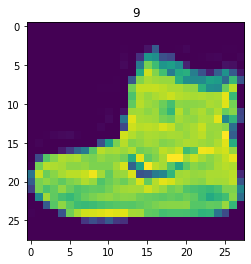

In [5]:
# Alumno, dibuje la primera imagen y su correspondiente categoria

primera_imagen = data_X_train[0]
plt.imshow(primera_imagen)
plt.title(data_y_train[0])
plt.show()

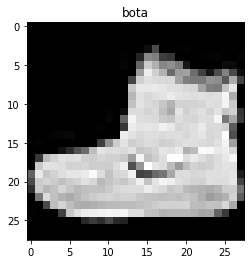

In [6]:


img = data_X_train[0]
imagen_copia = np.ones(shape=img.shape, dtype=np.uint8) * 255
imagen_copia[:, :] = img[:, :]
plt.title(category_list[data_y_train[0]])
plt.imshow(imagen_copia,cmap='gray')


# Procesar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline2.png" width="1000" align="middle">

In [7]:
# Alumno: Observar como está representada la imagen, ver fila del medio (14)
print(data_X_train[0][14,:])

[  0   0   1   4   6   7   2   0   0   0   0   0 237 226 217 223 222 219
 222 221 216 223 229 215 218 255  77   0]


In [8]:
# Alumno: Normalizar los datos entre 0 y 1
X_train_norm = data_X_train / 255
X_test_norm = data_X_test / 255
#X_train_norm[0][14,]

In [9]:
# Alumno: Imprimir la cantidad de datos en observacion (cantidad de imagenes)
print('Existen ,' , X_train_norm.shape[0] , ' imagenes')

Existen , 60000  imagenes


In [10]:
# Alumno: Imprimir la dimension de la imagen
print('Dimension : ' , X_train_norm.shape[1] , X_train_norm.shape[2] )

Dimension :  28 28


# Explorar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline3.png" width="1000" align="middle">

In [11]:
# Alumno: Explorar los primeros diez puloveres del dataset de train
primeros_pulover = []
for i in data_y_train:
  if len(primeros_pulover) == 10:
    break
  
  if i == 2:
    primeros_pulover.append(data_X_train[i])
  
  else:
    pass
  
#print(primeros_pulover)


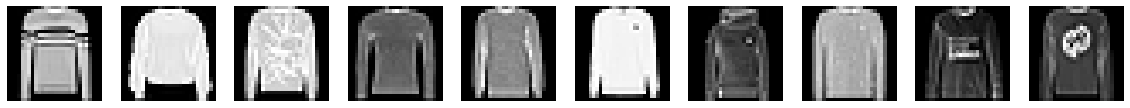

In [12]:
fig = plt.figure(figsize=(20,10))
j = 0 
for i in range (10):
  ax = fig.add_subplot(1 , 10 , 1+i)
  ax.axis('off')
  while True:
    if data_y_train[j] == 2:
      ax.imshow(X_train_norm[j] , cmap='gray' )
      j += 1
      break
    j += 1
plt.show()


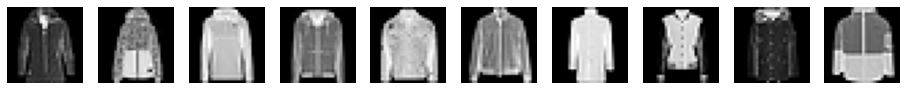

In [13]:
# Alumno: Explorar los primeros diez sacos del dataset de train
fig = plt.figure(figsize=(16,9))
j = 10

for i in range(10):
  ax = fig.add_subplot(1 , 10 , i+1 )
  ax.axis('off')
  while True:
    if category_list[data_y_train[j]] == 'saco':
    #if  data_y_train[j] == 4:
      ax.imshow(X_train_norm[j], cmap='gray')
      j += 1
      break
    j+=1
plt.show()

Se puede ver que los puloveres y los sacos son muy similares, salvo que los sacos tiene botones o cierre

#### Transformar los imagenes de 28x28 (2 dimensiones) en un array de una dimensión (28x28 = 784)
Esto se realiza porque las redes neuronales no soportan que se ingrese un array de dos dimensiones, solo soportan ingresar "N" features (un array)

In [14]:
# Alumno: Transformar el espacio de variable 28x28 a un vector de 784
# proceso de flatten --> transformar las imagenes en un vector de 1 dimension
pixels = X_train_norm.shape[1] * X_train_norm.shape[2]

X_train_flat = X_train_norm.reshape(X_train_norm.shape[0] , pixels).astype('float32')
X_test_flat  = X_test_norm.reshape(X_test_norm.shape[0] , pixels).astype('float32')

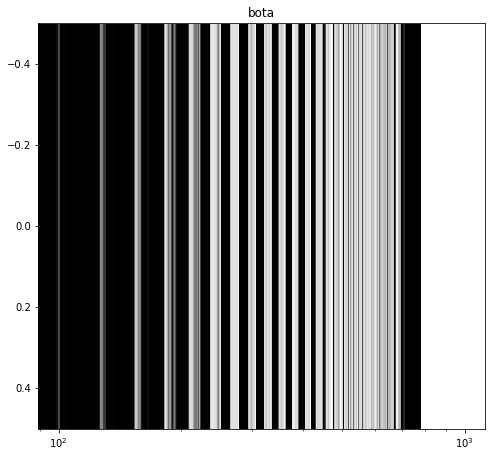

In [15]:
# Alumno: ¿Cómo se ve ahora nuestra primera imagen?
fig = plt.figure(figsize=(8,8))
primera_imagen = X_train_flat[[0]]
ax = fig.add_subplot()
plt.imshow(primera_imagen, cmap='gray')
ax.set_xscale("log")
plt.title(category_list[data_y_train[0]])
plt.show()


In [16]:
print('Datos en observacion:', X_train_flat.shape)

Datos en observacion: (60000, 784)


Son 60000 vectores, cada vector representa lo mismo que una fila de un dataset. Cada fila o vector tiene 784 columnas

In [17]:
print('Dimensión de cada imagen faltten:', X_train_flat[0].shape)

Dimensión de cada imagen faltten: (784,)


# Entrenar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline4.png" width="1000" align="middle">

Los datos ya estan dividios en train y test

In [18]:
# Alumno: Transformar la salida a oneHotEncoding con to_categorical
# tanto para data_y_train como para data_y_test
y_train_categ = to_categorical(data_y_train)
y_test_categ = to_categorical(data_y_test)
#data_y_test_categ.shape

In [19]:
# input shape
in_shape = X_train_flat.shape[1]
in_shape

784

In [20]:
# output shape
out_shape = y_train_categ.shape[1]
out_shape

10

In [21]:
from keras.layers import Dense, Dropout

# Alumno, crear un modelo con la cantidad de capas ocultas que crea
# mejor sin regularizacion
model = Sequential()
model.add(Dense(units=128, activation='relu', input_shape=(in_shape,)))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=64, activation='relu'))

model.add(Dense(units=out_shape, activation='softmax'))
model.compile(optimizer='Adam' , loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 113,546
Trainable params: 113,546
Non-trainable params: 0
_________________________________________________________________


In [22]:
history = model.fit(X_train_flat, y_train_categ, validation_split=0.2 , epochs=10, batch_size=128)

Epoch 1/10
375/375 [==============================] - 15s 4ms/step - loss: 0.8024 - accuracy: 0.7257 - val_loss: 0.4349 - val_accuracy: 0.8511
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.4104 - accuracy: 0.8528 - val_loss: 0.4078 - val_accuracy: 0.8503
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.3690 - accuracy: 0.8652 - val_loss: 0.3863 - val_accuracy: 0.8633
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.3366 - accuracy: 0.8757 - val_loss: 0.3443 - val_accuracy: 0.8759
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.3163 - accuracy: 0.8853 - val_loss: 0.3438 - val_accuracy: 0.8742
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.2958 - accuracy: 0.8930 - val_loss: 0.3344 - val_accuracy: 0.8772
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.2824 - accuracy: 0.8941 - val_loss: 0.3232 - val_accuracy: 0.8840
Epoch

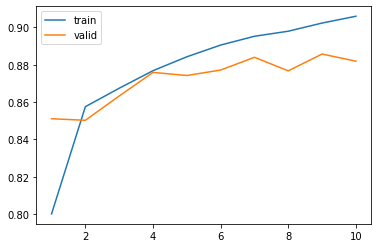

In [23]:
epoch_count = range(1, len(history.history['accuracy']) + 1)
sns.lineplot(x=epoch_count,  y=history.history['accuracy'], label='train')
sns.lineplot(x=epoch_count,  y=history.history['val_accuracy'], label='valid')
plt.show()

In [24]:
# Alumno: Tome el modelo anterior y agregue regularización
model = Sequential()

# Seleccione el dropout_ratev que mejor le funcione
dropout_rate = 0.2

model.add(Dense(units=128, activation='relu', input_shape=(in_shape,)))
model.add(Dropout(dropout_rate))
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(dropout_rate))
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(dropout_rate))
model.add(Dense(units=out_shape, activation='softmax'))
model.compile(optimizer='Adam' , loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

In [25]:
history = model.fit(X_train_flat, y_train_categ, validation_split=0.2 , epochs=10, batch_size=128)

Epoch 1/10
375/375 [==============================] - 3s 4ms/step - loss: 1.1249 - accuracy: 0.6008 - val_loss: 0.4411 - val_accuracy: 0.8434
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.4993 - accuracy: 0.8250 - val_loss: 0.4093 - val_accuracy: 0.8522
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.4379 - accuracy: 0.8439 - val_loss: 0.3728 - val_accuracy: 0.8635
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.4096 - accuracy: 0.8546 - val_loss: 0.3906 - val_accuracy: 0.8528
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.3892 - accuracy: 0.8610 - val_loss: 0.3549 - val_accuracy: 0.8719
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.3720 - accuracy: 0.8668 - val_loss: 0.3464 - val_accuracy: 0.8758
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.3538 - accuracy: 0.8719 - val_loss: 0.3462 - val_accuracy: 0.8743
Epoch 

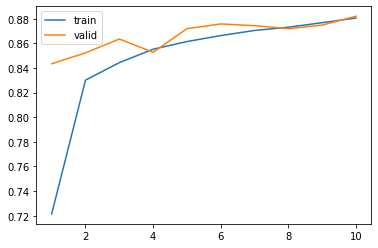

In [26]:
epoch_count = range(1, len(history.history['accuracy']) + 1)
sns.lineplot(x=epoch_count,  y=history.history['accuracy'], label='train')
sns.lineplot(x=epoch_count,  y=history.history['val_accuracy'], label='valid')
plt.show()

In [27]:
# Alumno: Predecir las probabilidades del dataset X_test
predict = model.predict(X_test_flat)

In [28]:
# Alumno: Transformar las probabilidades en y_hat usando argmax
y_hat = np.argmax(predict, axis=1)
y_hat

array([9, 2, 1, ..., 8, 1, 5])

# Validar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline5.png" width="1000" align="middle">

In [29]:
# Alumno: Utilizar evaluate para calcular la exactitud (accuracy)
model.evaluate(X_test_flat , y_test_categ)

313/313 [==============================] - 1s 2ms/step - loss: 0.3492 - accuracy: 0.8753


[0.349202424287796, 0.8752999901771545]

TypeError: ignored

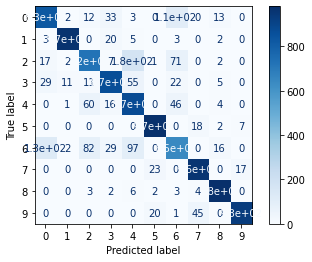

In [79]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay , plot_confusion_matrix

#fig, ax = plt.subplots(figsize=(10, 10))
#plot_confusion_matrix(y_hat, X_test_flat, y_test_categ, ax=ax)

cm = confusion_matrix(y_test_categ.argmax(axis=1),y_hat)
cmd = ConfusionMatrixDisplay(cm, display_labels=list(range(10) ))

cmd.plot(cmap=plt.cm.Blues)
cmd.plot(figsize=(15, 5))

plt.show()


Se puede observar que hay muy malas predicciones en los sacos y vestidos

# Utilizar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline6.png" width="1000" align="middle">

Se utiliza el ranking de los peores 10 sacos clasificados para evaluar

In [31]:
rank_saco = [4166, 4641, 6513, 324, 9292, 4646, 3290, 5255, 5919, 1329]


In [32]:
# Alumno: Obtener los vectores para evaluar los sacos indicados
# Utilizar como máscara rank_saco
X_test_saco = X_test_flat[rank_saco]
y_test_saco = y_test_categ[rank_saco]



In [33]:
# Alumno: Calcular la exactitud de los sacos seleccionados
model.evaluate(X_test_saco,y_test_saco)

1/1 [==============================] - 0s 17ms/step - loss: 1.5545 - accuracy: 0.3000


[1.554484248161316, 0.30000001192092896]

In [34]:
# Alumno: Realizar la prediccion con los X_test de los sacos
# y calcular los y_hat de esos sacos (lo que el sistema ve)
y_hat_saco = model.predict(X_test_saco)
y_hat_saco = np.argmax(y_hat_saco , axis = 1)
#category_list = ["remera_corta", "pantalon", "pulover", "vestido", "saco", "sandal",
                 #"remera_larga", "zapatilla", "bolso", "bota"]
#category_list[y_hat_saco[]]

lista = []
for i in range(len(y_hat_saco)):
    lista.append(category_list[y_hat_saco[i]])
lista


['pulover',
 'saco',
 'pulover',
 'remera_larga',
 'saco',
 'pulover',
 'saco',
 'pulover',
 'pulover',
 'pulover']

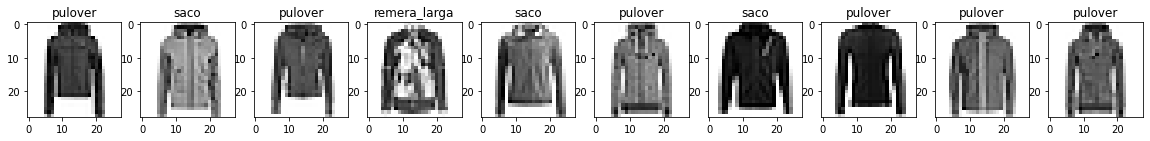

In [35]:
# Alumno: Dibujar las imagenes del dataset X_test correspondiente
# a los IDs de los sacos especificados y colocar arriba de cada imagen
# lo que el modelo predijo
# Utilizar "category_list" para transformar el número a la categoría
fig = plt.figure(figsize=(20,10))
j = 0 

for i in rank_saco:
  ax = fig.add_subplot(1 , 10 , 1+j)
  ax.imshow(X_test_norm[i], cmap = 'Greys')
  ax.set_title(category_list[y_hat_saco[j]])
  j += 1
plt.show()


# Conclusión
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline7.png" width="1000" align="middle">

Al utilizar deep larning no es posible diferenciar bien entre los sacos y los puloveres, el modelo es incapaz de ver los botones o los cierres que son la clave para diferenciarlos. Una alternativa es probar con redes más aptas para detección de imagenes (las CNN convolucionales, que veremos más adelante)